## Import Necessary Packages

In [2]:
from Simulation import MonteCarloSimulation
from HouseRules import HouseRules
from Player import Player
from Count import HiLoCount
from Strategy import BasicStrategyS17, BasicStrategyH17, CasinoStrategy 
from Strategy import RandomStrategy, NoBustStrategy
from Betting import FlatSpread, RandomSpread, Spread1_6, Spread1_8
from Betting import Spread1_12, Spread1_25_WongOut

## Set Game Rules

`standS17`: If `True`, dealer will stand on soft 17. Otherwise, dealer only stands on hard 17 and above

`DASoffered`: If `True`, the player can double after splitting pairs.

`LSoffered`: If `True`, the player can surrender their hand after the dealer up card is shown.

`NBJPayout`: Controls the payout to the player when they hit a natural blackjack. Depending on the casino, this value can be 1.5 (3:2), 1.2 (6:5) or 1 (1:1).

`numDecks`: Controls the number of decks to be used in the shoe. Depending on the casino, this value can be 1, 2, 4, 6 or 8.

`penetration`: Controls how many decks should be left in the shoe when it's time to reshuffle the deck. This should be equal to half of the number of decks used. 

`minBet`: Controls the minimum a player must bet in order to play

In [4]:
HouseRules = HouseRules(standS17 = False, DASoffered = True, 
             LSoffered = True, NBJpayout = 1.5, penetration = 4,
             minBet = 15, numDecks = 8)

## Set Up Card Counting System

In [6]:
count = HiLoCount()

## Create Player

`initialBankroll`: Controls how much money a player starts with.

#### Strategy
`strategy`: Controls what strategy a player uses

`isCounting`: If `True`, the player will use card counting. Only has an affect on Basic                     Strategy play styles.

`strategyAccuracy`: Conrols how accurate the player plays the startegy. Only affects Basic Strategy play styles.

The following strategies are available:

**BasicStrategyS17:** This follows basic strategy for a game where the dealer stands on soft 17. `isCounting` can be set to `True` if the player is counting cards.

**BasicStrategyH17:** This follows basic strategy for a game where the dealer hits on soft 17. `isCounting` can be set to `True` if the player is counting cards.

**CasinoStrategy:** This will make the player play the same as the casino.

**NoBustStrategy:** This will make the player play in such a way that they can't go bust.

**RandomStrategy:** This will randomly select an action for the player.

#### Betting Spreads
`betting`: Controls the bet spread a player uses.

The following bet spreads are available:

**FlatSpread:** Player bets the minimum bet each hand.

**RandomSpread:** Player bets a random amount each hand.

**Spread1_6:** Player uses a 1-6 bet spread.

**Spread1_8:** Player uses a 1-8 bet spread.

**Spread1_12:** Player uses a 1-12 bet spread.

**Spread1_25_WongOut:** Player uses a 1-25 bet spread and will not play when the count is too low.

Full details of each bet spread can be found in Betting.py

In [8]:
playerConfigs = [{
    'initialBankroll': 50000,
    'strategy_class': BasicStrategyH17,
    'isCounting': False,
    'strategyAccuracy': 1,
    'betting': FlatSpread
}]

## Create and Run Simulation

`numTrials`: Controls how many trials are run. Consider this to be a playing session.

`numHands`: Controls how many hands are played per trial. On average, a casino will play 100 hands per hour (for example, 500 hans equals 5 hours of play).

`isTrialsVerbose`: If `True`, stats about each trial will be printed. It is recommended this stays `False` unless you are only running 1 trial.


MONTE CARLO SIMULATION RESULTS
Total Hands Played:  513
Mean Final Bankroll: $ 49960.17
Median Final Bankroll: $ 49962.50
Final Bankroll Std. Dev.: $ 392.69
Mean Player Edge: -0.48%
Edge Std. Dev.:  4.60%


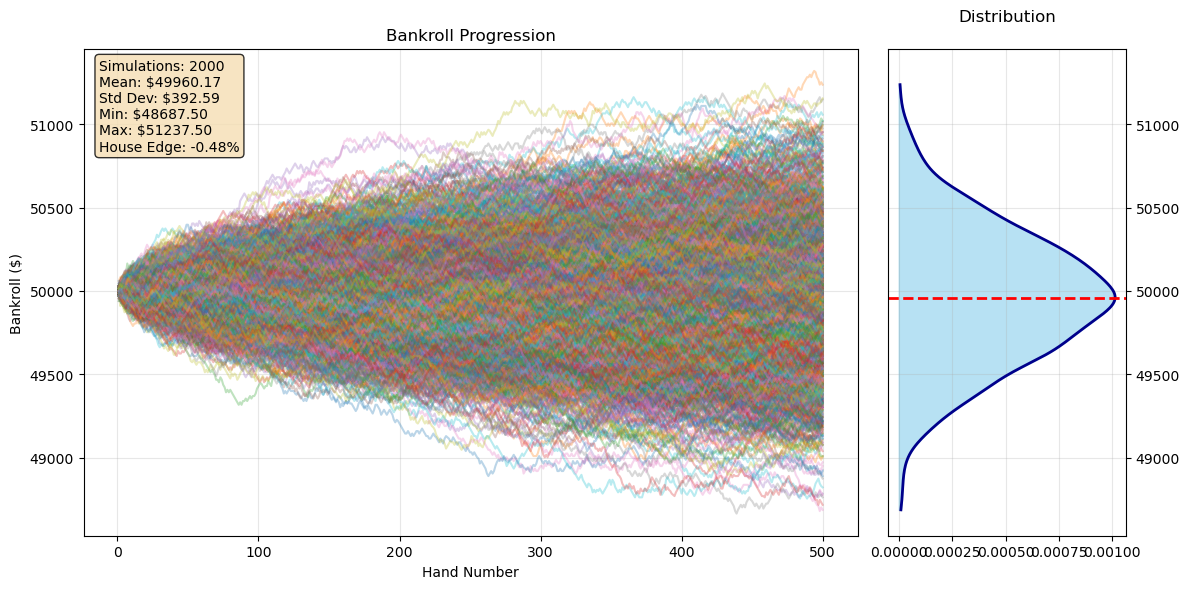

In [10]:
sim = MonteCarloSimulation(HouseRules, playerConfigs = playerConfigs)

sim.RunSimulations(numTrials = 2000, numHands = 500, 
                   isTrialsVerbose = False, count = count)